In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
!git clone -b v7.0 https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.57 MiB | 15.10 MiB/s, done.
Resolving deltas: 100% (11541/11541), done.
Note: switching to '915bbf294bb74c859f0b41f1c23bc395014ea679'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



Download the original weight of the YOLOv8 Nano pretrained model, if you see the **yolov8.pt** you don't need to download it again

In [ ]:
# Download pretrained model from Ultralytics github for training
!wget https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt


The roboflow export data will have a link for us. Copy the link in this part:
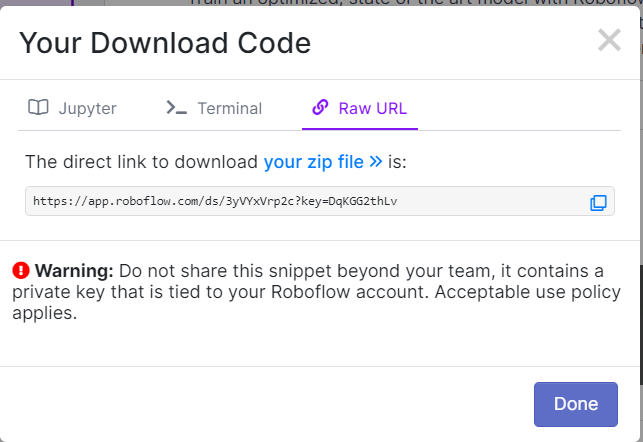

And paste it into the url.
The file_name will be the name of which file you want to store our data.
After config the **url** and **file_name** run two following script inorder to download the data, you can read my guide at the top of each section.

In [ ]:
# Run this to save the config
# url = "https://app.roboflow.com/ds/02q3v9ukkt?key=nqnJ1CUFXS" #v5
# url = "https://app.roboflow.com/ds/ivqg7l4fZl?key=as1aFnmWdx" #v6
# url = "https://app.roboflow.com/ds/Enz36gMSpi?key=otp9k8CxFY" #v7
# url = "https://app.roboflow.com/ds/L6xGurPpmG?key=P8XFYHNXQH" #verror
url = "https://app.roboflow.com/ds/uvXM0YzZi6?key=mKcwwS4iMN" #v8
file_name = "data"

In [ ]:
# Run this to download dataset from Roboflow and unzip it

dl_name = url.split("/")[-1]
!wget {url}
!unzip {dl_name} -d {file_name}
!rm -r {dl_name}



In [ ]:
# Run this script to start the training process, the result will be stored in runs.
from ultralytics import YOLO
import os

# Config parameter for training
# model_name = "yolov8n.pt"
model_name = "model_v8.pt"
num_epochs = 100
batch_size = 16
size = 640
data_path = os.path.join("/content", file_name, "data.yaml")
export_name = "dish_model_testing"

model = YOLO(model_name)
model.train(data = data_path, epochs = num_epochs, batch = batch_size, name = export_name, close_mosaic = 0, imgsz = size)





In [ ]:
# Export to onnx:

import os
import sys

from ultralytics import YOLO

model_path = "/content/yolov5s-seg.pt"
# model_path = os.path.join("/content/runs/detect", export_name, "weights/best.pt")
model = YOLO(model_path)
model.export(format = 'onnx', int8 = True)

In [ ]:
from ultralytics import YOLO
model_path = './model_v7.pt'

model = YOLO('/content/model_v8.onnx')
result = model.predict(source = '/content/image.jpeg', imgsz = 640, save = True, conf = 0.7)
for r in result:
  print(r.boxes.xywh.cpu().numpy())

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading /content/model_v8.onnx for ONNX Runtime inference...

image 1/1 /content/image.jpeg: 640x640 2 b_mas, 2 b_phaos, 2 b_sis, 5 b_tots, 1 b_tuong, 2 b_vois, 2 b_xes, 2 r_binhs, 541.7ms
Speed: 138.3ms preprocess, 541.7ms inference, 4884.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
[[     384.94      118.68      51.279      53.892]
 [     522.23       109.8      52.254      56.759]
 [      135.7      256.46      53.437      56.391]
 [      193.5      130.41      51.584      56.281]
 [     460.73      112.28      50.203      52.995]
 [     260.84      127.41      49.663      53.923]
 [     594.07      106.61      53.312      56.395]
 [     342.13      302.35      50.499      56.375]
 [      525.6      231.52      54.161      55.958]
 [     69.692      136.16      50.255

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16836, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 16836 (delta 1), reused 6 (delta 0), pack-reused 16825
Receiving objects: 100% (16836/16836), 15.58 MiB | 15.83 MiB/s, done.
Resolving deltas: 100% (11545/11545), done.


In [ ]:
!cd yolov5

In [ ]:
!pwd

/content


In [ ]:

!python yolov5/export.py --weights yolov5/yolov5s-seg.pt --include torchscript onnx

export: data=yolov5/data/coco128.yaml, weights=['yolov5/yolov5s-seg.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-0-g915bbf29 Python-3.10.12 torch-2.3.1+cu121 CPU

100% 14.9M/14.9M [00:00<00:00, 30.7MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

PyTorch: starting from yolov5/yolov5s-seg.pt with output shape (1, 25200, 117) (14.9 MB)

TorchScript: starting export with torch 2.3.1+cu121...
TorchScript: export success ✅ 4.2s, saved as yolov5/yolov5s-seg.torchscript (29.5 MB)
requirements: YOLOv5 requirement "onnx" not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 86.4 MB/s eta 0:00:00

requirements: 1 package u

In [ ]:
!git clone -b yolov5-v7.0 https://github.com/wang-xinyu/tensorrtx.git

Cloning into 'tensorrtx'...
remote: Enumerating objects: 2973, done.
remote: Counting objects: 100% (1022/1022), done.
remote: Compressing objects: 100% (456/456), done.
remote: Total 2973 (delta 760), reused 661 (delta 557), pack-reused 1951
Receiving objects: 100% (2973/2973), 2.20 MiB | 7.77 MiB/s, done.
Resolving deltas: 100% (1940/1940), done.
Note: switching to 'f39f2c14336768e1dccce0b17a3604c4bbbcd1a2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false



In [ ]:
!cd tensorrtx

In [ ]:
!python tensorrtx/yolov5/gen_wts.py -w tensorrtx/yolov5s-seg.pt -o yolov5s-seg.wts


Traceback (most recent call last):
  File "/content/tensorrtx/yolov5/gen_wts.py", line 6, in <module>
    from utils.torch_utils import select_device
ModuleNotFoundError: No module named 'utils.torch_utils'


In [ ]:
!pip install -r tensorrtx/requirements.txt

In [ ]:
%cd /content/yolov5
!pwd
!cp /content/tensorrtx/yolov5/gen_wts.py .
!python3.10 gen_wts.py -w /content/tensorrtx/yolov5s-seg.pt -o /content/tensorrtx/yolov5s-seg.wts

/content/yolov5
/content/yolov5
Generating .wts for detect model
Loading /content/tensorrtx/yolov5s-seg.pt
YOLOv5 🚀 v7.0-0-g915bbf29 Python-3.10.12 torch-2.3.1+cu121 CPU

Writing into /content/tensorrtx/yolov5s-seg.wts
